In [ ]:
# Mount the Google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import numpy as np
from matplotlib import pyplot as plt
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!sudo apt -y install libportaudio2
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools
!pip install -q opencv-python-headless==4.1.2.30
!pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 1s (54.3 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121753 fi

In [ ]:
#!pip install -q tflite-model-maker

In [ ]:
!python3 -m pip install tflite-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.6 MB/s eta 0:00:00


In [ ]:
! python3 -m pip install --extra-index-url https://google-coral.github.io/py-repo/ pycoral

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 16.6 MB/s eta 0:00:00
  Created wheel for area: filename=area-1.1.1-py3-none-any.whl size=3609 sha256=563594d6a30c0f4b87dbd2b9f35d6b07ac5693af60821651c3f91a48d4afe55a
  Stored in directory: /root/.cache/pip/wheels/c4/92/91/816c5f793f8cc39528874147b39cea007e60195a5cb7c57100
Successfully built area
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.
pandas-gbq 0.19

In [ ]:
# Loading libraries
from tflite_runtime.interpreter import Interpreter
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import tflite_runtime.interpreter as tflite
#from pycoral.adapters import common
#from pycoral.adapters import detect
#from pycoral.utils.dataset import read_label_file

from PIL import Image
import numpy as np
import time
import datetime
import cv2 as cv
import os
import csv
font = cv.FONT_HERSHEY_DUPLEX

In [ ]:
import tensorflow as tf

In [ ]:
def load_labels(path): # Read the labels from the text file as a Python list.
    with open(path, 'r') as f:
        return [line.strip() for i, line in enumerate(f.readlines())]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.nanmax(x))
    return e_x / np.nansum(e_x)

In [ ]:
import shutil
shutil.copyfile('/content/drive/MyDrive/augTestFinal/YOLOV8_bee_detectors/YOLOv8n.zip','/content/model.zip')

'/content/model.zip'

In [ ]:
import shutil
shutil.copyfile('/content/drive/MyDrive/APV2_objectdetectionModels/efficientDetLite1_2024/efficientDet_2024_tAll.tflite','/content/model.tflite')

'/content/model.tflite'

In [ ]:
!unzip /content/model.zip

Archive:  /content/model.zip
   creating: YOLOv8n/
  inflating: YOLOv8n/best.onnx       
  inflating: YOLOv8n/best.pb         
  inflating: YOLOv8n/best.pt         
   creating: YOLOv8n/best_saved_model/
   creating: YOLOv8n/best_saved_model/assets/
  inflating: YOLOv8n/best_saved_model/best_float16.tflite  
  inflating: YOLOv8n/best_saved_model/best_float32.tflite  
  inflating: YOLOv8n/best_saved_model/metadata.yaml  
  inflating: YOLOv8n/best_saved_model/saved_model.pb  
   creating: YOLOv8n/best_saved_model/variables/
 extracting: YOLOv8n/best_saved_model/variables/variables.data-00000-of-00001  
  inflating: YOLOv8n/best_saved_model/variables/variables.index  
   creating: YOLOv8n/best_web_model/
  inflating: YOLOv8n/best_web_model/group1-shard1of3.bin  
  inflating: YOLOv8n/best_web_model/group1-shard2of3.bin  
  inflating: YOLOv8n/best_web_model/group1-shard3of3.bin  
  inflating: YOLOv8n/best_web_model/metadata.yaml  
  inflating: YOLOv8n/best_web_model/model.json  
  inflating

In [ ]:
# Loading model and generating input and output details
#model_path = '/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Akash/EAD_int8.tflite'
model_path = '/content/YOLOv8n/best_saved_model/best_float16.tflite'
#model_path = '/content/YOLOv8l/best_saved_model/best_float16.tflite'
#model_path = '/content/best_float16.tflite'
#model_path = '/content/model.tflite'
interpreter = Interpreter(model_path)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter = tf.lite.Interpreter(model_content=model_path)
interpreter.allocate_tensors()

In [ ]:
# Setting up index(s) to call from model
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
print(input_details)

[{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 384, 384,   3], dtype=int32), 'shape_signature': array([  1, 384, 384,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 127), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([127], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
print(output_details)

[{'name': 'StatefulPartitionedCall:1', 'index': 717, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 715, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:0', 'index': 718, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimen

In [ ]:
image = np.random.rand(1,384,384,3).astype(np.uint8)

In [ ]:
interpreter.allocate_tensors()

In [ ]:
output_index = interpreter.get_output_details()[1]["index"]

In [ ]:
interpreter.set_tensor(input_index, image)
interpreter.invoke()
predictions = interpreter.get_tensor(output_index)

In [ ]:
output_details

In [ ]:
# 0 - score
# 1 - bbox
# 2 - number boxes
# 3 - class ID

In [ ]:
predictions[0][0]

array([0.67701495, 0.86467654, 1.0063572 , 0.99534684], dtype=float32)

In [ ]:
# generating random noise as a sample input

randomNoise = np.random.rand(128,628,1)*255
image = (np.expand_dims(randomNoise,0)).astype(np.uint8)

In [ ]:
# generating random noise as a sample input

# input 1
randomNoise = np.ones((128,314))*255
randomNoise2 = np.zeros((128,314))*255
randomNoise = np.concatenate((randomNoise,randomNoise2),1)
image1 = (np.expand_dims(randomNoise,0)).astype(np.uint8)
image1 = np.expand_dims(image1,3)

# input 2
randomNoise = np.random.rand(128,628,1)*255
image2 = (np.expand_dims(randomNoise,0)).astype(np.uint8)

# input 3
randomNoise = np.ones((128,314))*255
randomNoise2 = np.zeros((128,314))*255
randomNoise = np.concatenate((randomNoise2,randomNoise),1)
image3 = (np.expand_dims(randomNoise,0)).astype(np.uint8)
image3 = np.expand_dims(image3,3)

# input 4
randomNoise = np.random.rand(128,628,1)*255
image4 = (np.expand_dims(randomNoise,0)).astype(np.uint8)


In [ ]:
from matplotlib import pyplot as plt

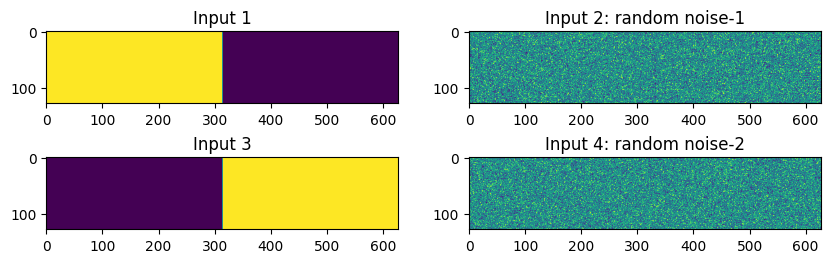

In [ ]:
plt.subplots(2,2,figsize=(10,3))
plt.subplot(2,2,1)
plt.imshow(image1[0])
plt.title('Input 1')
plt.subplot(2,2,2)
plt.title('Input 2: random noise-1')
plt.imshow(image2[0])
plt.subplot(2,2,3)
plt.title('Input 3')
plt.imshow(image3[0])
plt.subplot(2,2,4)
plt.title('Input 4: random noise-2')
plt.imshow(image4[0])

In [ ]:
interpreter.allocate_tensors()

In [ ]:
#Run inference from model
interpreter.set_tensor(input_index, image)
interpreter.invoke()
predictions = interpreter.get_tensor(output_index)

In [ ]:
output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

In [ ]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 19,
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.00390625, 0),
  'quantization_parameters': {'scales': array([0.00390625], dtype=float32),
   'zero_points': array([0], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

Text(1, 0.5334375, '0.5234375')

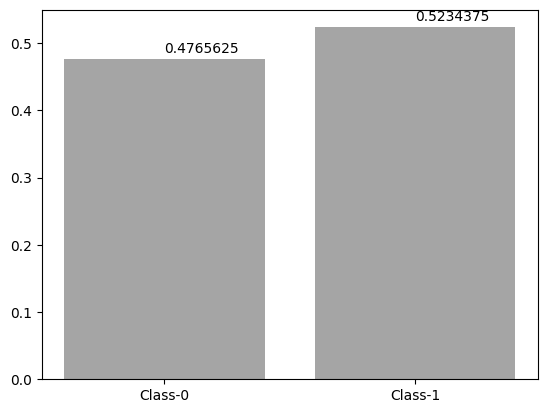

In [ ]:
plt.bar(np.arange(0,2),output,color=(0.3,0.3,0.3,0.5))
plt.xticks([0,1],['Class-0','Class-1'])
plt.text(0,output[0]+0.01,str(output[0]))
plt.text(1,output[1]+0.01,str(output[1]))

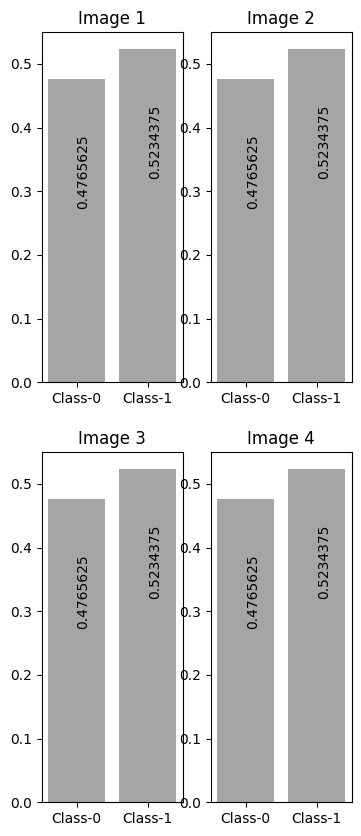

In [ ]:
# Results from the four random images
# Shows same inference results from 4 very different inputs

imageBin = [image1,image2,image3,image4]
interpreter.allocate_tensors()

plt.subplots(2,2,figsize=(4,10))
for ind1,im in enumerate(imageBin):

  plt.subplot(2,2,ind1+1)

  interpreter.set_tensor(input_index, im)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

  plt.bar(np.arange(0,2),output,color=(0.3,0.3,0.3,0.5))
  plt.xticks([0,1],['Class-0','Class-1'])
  plt.text(0,output[0]-0.2,str(output[0]),rotation=90)
  plt.text(1,output[1]-0.2,str(output[1]),rotation=90)
  plt.title('Image '+str(ind1+1))

Loading new models trained in TFlite

In [ ]:
# Loading model and generating input and output details
#model_path = '/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Matt/testModels/mobilenetV2_01/ele_mobilenetv2_1.tflite'
#model_path = '/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Matt/testModels/mobilenetV2_02/ele_mobilenetv2_2.tflite'
model_path = '/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Matt/testModels/efficientNet_lite0/ele_efficentNetLite0_1.tflite'
interpreter = Interpreter(model_path)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_details

[{'name': 'inputs_0',
  'index': 0,
  'shape': array([  1, 640, 640,   3], dtype=int32),
  'shape_signature': array([  1, 640, 640,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
output_details

[{'name': 'Identity',
  'index': 537,
  'shape': array([   1,    5, 8400], dtype=int32),
  'shape_signature': array([   1,    5, 8400], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
# Setting up index(s) to call from model
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# input 1
randomNoise = np.ones((640,320))*255
randomNoise2 = np.zeros((640,320))*255
randomNoise = np.concatenate((randomNoise,randomNoise2),1)
image1 = (np.expand_dims(randomNoise,0))#.astype(np.uint8)
image1 = np.expand_dims(image1,3)


imageBin = [image1]
interpreter.allocate_tensors()

plt.subplots(2,2,figsize=(4,10))
for ind1,im in enumerate(imageBin):

  plt.subplot(2,2,ind1+1)
  test = np.zeros((1,224,224,3))
  test[:,:,:] = im
  test[:,:,:] = im
  test[:,:,:] = im
  test = test.astype(np.uint8)



  interpreter.set_tensor(input_index, test)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)

RuntimeError: ignored

In [ ]:
# input 1
randomNoise = np.ones((224,112))*255
randomNoise2 = np.zeros((224,112))*255
randomNoise = np.concatenate((randomNoise,randomNoise2),1)
image1 = (np.expand_dims(randomNoise,0))#.astype(np.uint8)
image1 = np.expand_dims(image1,3)

# input 2
randomNoise = np.random.rand(224,224,1)*255
image2 = (np.expand_dims(randomNoise,0))#.astype(np.uint8)

# input 3
randomNoise = np.ones((224,112))*255
randomNoise2 = np.zeros((224,112))*255
randomNoise = np.concatenate((randomNoise2,randomNoise),1)
image3 = (np.expand_dims(randomNoise,0))#.astype(np.uint8)
image3 = np.expand_dims(image3,3)

# input 4
randomNoise = np.random.rand(224,224,1)*255
image4 = (np.expand_dims(randomNoise,0))#.astype(np.uint8)

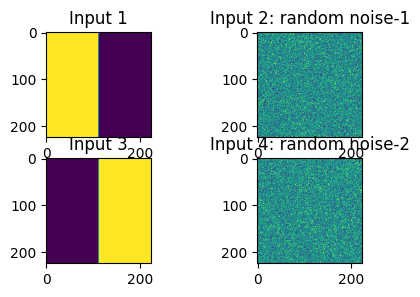

In [ ]:
plt.subplots(2,2,figsize=(5,3))
plt.subplot(2,2,1)
plt.imshow(image1[0])
plt.title('Input 1')
plt.subplot(2,2,2)
plt.title('Input 2: random noise-1')
plt.imshow(image2[0])
plt.subplot(2,2,3)
plt.title('Input 3')
plt.imshow(image3[0])
plt.subplot(2,2,4)
plt.title('Input 4: random noise-2')
plt.imshow(image4[0])

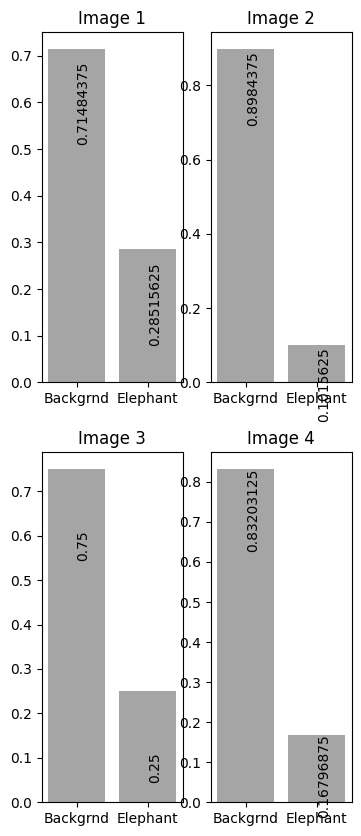

In [ ]:
imageBin = [image1,image2,image3,image4]
interpreter.allocate_tensors()

plt.subplots(2,2,figsize=(4,10))
for ind1,im in enumerate(imageBin):

  plt.subplot(2,2,ind1+1)
  test = np.zeros((1,224,224,3))
  test[:,:,:] = im
  test[:,:,:] = im
  test[:,:,:] = im
  test = test.astype(np.uint8)



  interpreter.set_tensor(input_index, test)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

  plt.bar(np.arange(0,2),output,color=(0.3,0.3,0.3,0.5))
  plt.xticks([0,1],['Backgrnd','Elephant'])
  plt.text(0,output[0]-0.2,str(output[0]),rotation=90)
  plt.text(1,output[1]-0.2,str(output[1]),rotation=90)
  plt.title('Image '+str(ind1+1))

Load in samples to test accuracy

<ipython-input-15-e8bd8e6a712f>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,indCnt+1)
<ipython-input-15-e8bd8e6a712f>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,indCnt+2)


<Figure size 640x480 with 0 Axes>

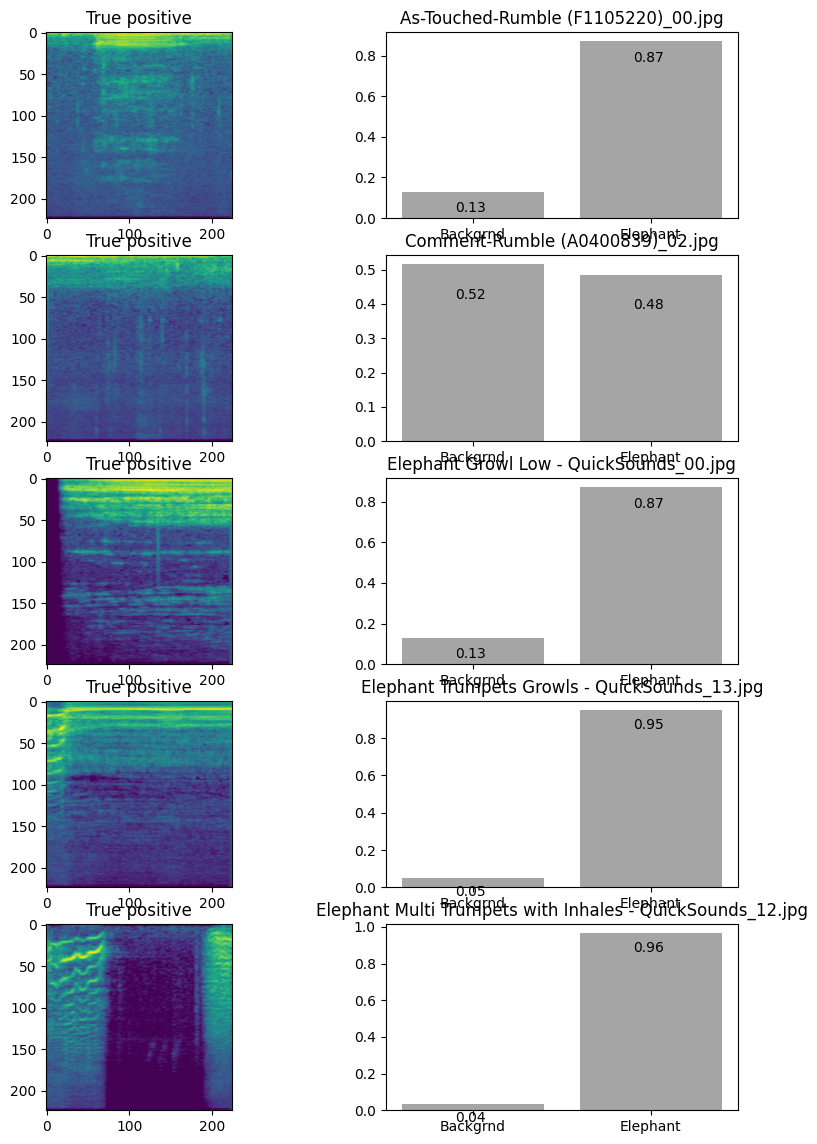

In [ ]:
#@title Loading true positives
import glob
getFiles = glob.glob('/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Matt/testModels/sample_specs/Elephant/*')
#in1 = cv.imread(getFiles[0])
plt.figure()
plt.subplots(4,2,figsize=(10,14))

indCnt = 0
for ind1,im in enumerate(getFiles[:5]):
  plt.subplot(5,2,indCnt+1)
  in1 = cv.imread(im)[:,:,::-1]
  plt.imshow(in1[:,:,0])
  plt.title('True positive')

  in1 = np.expand_dims(in1,0)
  plt.subplot(5,2,indCnt+2)
  interpreter.set_tensor(input_index, in1)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

  plt.bar(np.arange(0,2),output,color=(0.3,0.3,0.3,0.5))
  plt.xticks([0,1],['Backgrnd','Elephant'])
  plt.text(-0.1,output[0]-0.1,str(np.round(output[0],2)),rotation=0)
  plt.text(0.9,output[1]-0.1,str(np.round(output[1],2)),rotation=0)
  plt.title(im.split('/')[-1])

  indCnt+=2

<Figure size 640x480 with 0 Axes>

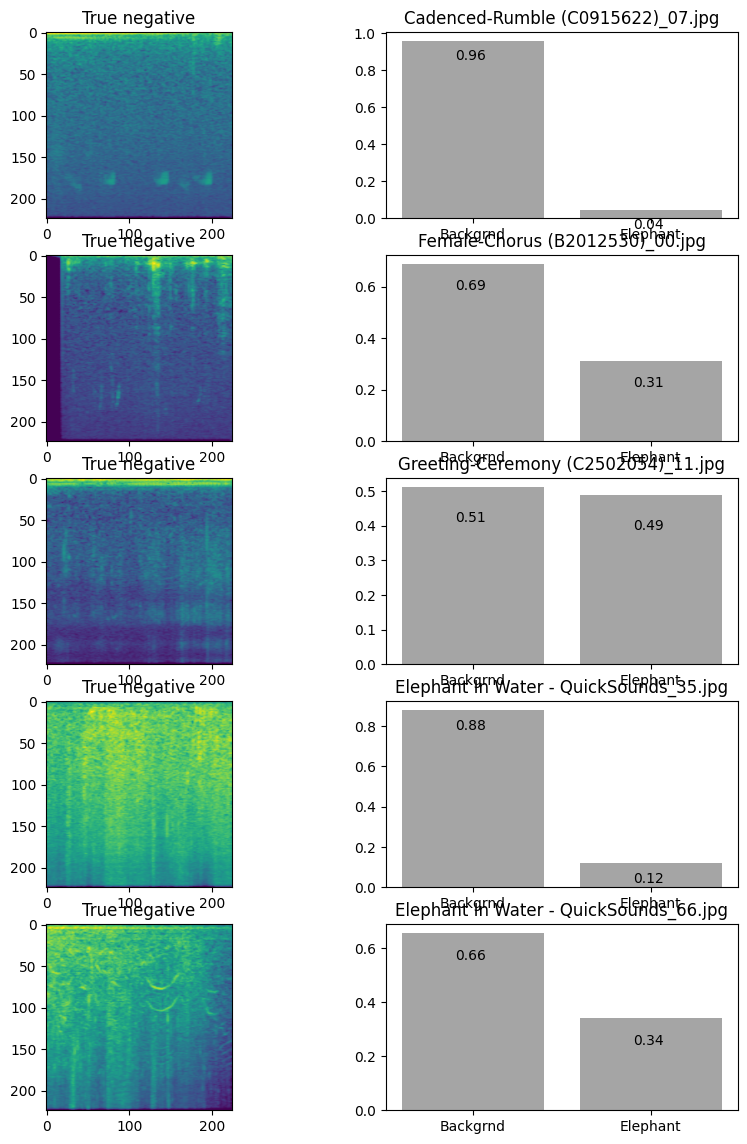

In [ ]:
#@title Loading true negatives
import glob
getFiles = glob.glob('/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Matt/testModels/sample_specs/Background/*')
#in1 = cv.imread(getFiles[0])
plt.figure()
plt.subplots(5,2,figsize=(10,14))

indCnt = 0
for ind1,im in enumerate(getFiles[:5]):
  plt.subplot(5,2,indCnt+1)
  in1 = cv.imread(im)[:,:,::-1]
  plt.imshow(in1[:,:,0])
  plt.title('True negative')

  in1 = np.expand_dims(in1,0)
  plt.subplot(5,2,indCnt+2)
  interpreter.set_tensor(input_index, in1)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

  plt.bar(np.arange(0,2),output,color=(0.3,0.3,0.3,0.5))
  plt.xticks([0,1],['Backgrnd','Elephant'])
  plt.text(-0.1,output[0]-0.1,str(np.round(output[0],2)),rotation=0)
  plt.text(0.9,output[1]-0.1,str(np.round(output[1],2)),rotation=0)
  plt.title(im.split('/')[-1])

  indCnt+=2

In [ ]:
# making a confusion matrix

trueP = glob.glob('/content/drive/MyDrive/eleAudio1/images/elephant/*')
trueN = glob.glob('/content/drive/MyDrive/eleAudio1/images/back/*')
tp = 0
tn = 0
fn= 0
fp = 0
for im in trueP:
  in1 = cv.imread(im)[:,:,::-1]
  in1 = np.expand_dims(in1,0)
  interpreter.set_tensor(input_index, in1)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

  if output[0] > 0.5:
    fn+=1
  else:
    tp+=1

for im in trueN:
  in1 = cv.imread(im)[:,:,::-1]
  in1 = np.expand_dims(in1,0)
  interpreter.set_tensor(input_index, in1)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_index)
  output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

  if output[0] > 0.5:
    tn+=1
  else:
    fp+=1

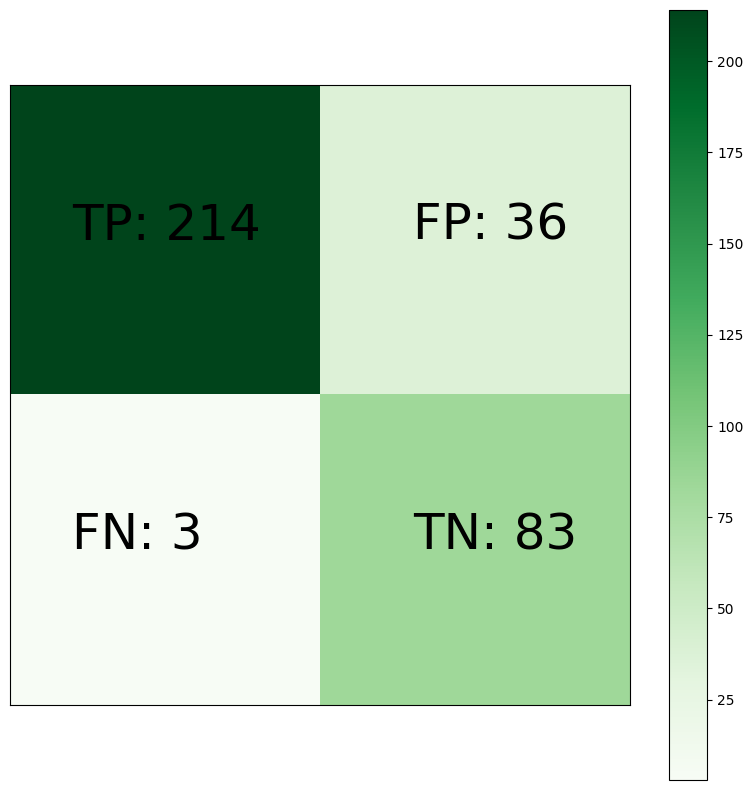

In [ ]:

confMat = np.zeros((2,2))
confMat[0,0] = tp
confMat[1,1] = tn
confMat[0,1] = fp
confMat[1,0] = fn
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(confMat,cmap='Greens')
plt.xticks([])
plt.xticks([])
plt.text(-0.3,0,'TP: '+str(tp),fontsize=36)
plt.text(0.8,0,'FP: '+str(fp),fontsize=36)
plt.text(-0.3,1,'FN: '+str(fn),fontsize=36)
plt.text(0.8,1,'TN: '+str(tn),fontsize=36)
plt.xticks([])
plt.yticks([])
plt.colorbar()

In [ ]:
import glob
getFiles = glob.glob('/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Matt/trainingData/images/back/*')

In [ ]:
getFiles[8]

'/content/drive/Shareddrives/Elephant-AID/Model-TensorFlow_Matt/trainingData/images/back/Cadenced-Rumble (C0915622)_08.jpg'

Text(0.5, 1.0, 'Elephant In Water - QuickSounds_66.jpg')

<Figure size 640x480 with 0 Axes>

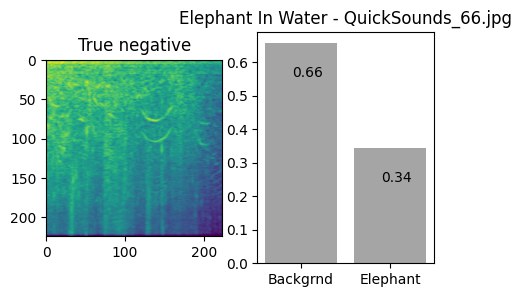

In [ ]:
getFile = getFiles[8]
#in1 = cv.imread(getFiles[0])
plt.figure()
plt.subplots(1,2,figsize=(5,3))

indCnt = 0
plt.subplot(1,2,indCnt+1)
in1 = cv.imread(im)[:,:,::-1]
plt.imshow(in1[:,:,0])
if getFile.find('back') != -1:
  plt.title('True negative')
else:
  plt.title('True Positive')

in1 = np.expand_dims(in1,0)
plt.subplot(1,2,indCnt+2)
interpreter.set_tensor(input_index, in1)
interpreter.invoke()
predictions = interpreter.get_tensor(output_index)
output = np.squeeze(predictions)*output_details[0]['quantization_parameters']['scales']

plt.bar(np.arange(0,2),output,color=(0.3,0.3,0.3,0.5))
plt.xticks([0,1],['Backgrnd','Elephant'])
plt.text(-0.1,output[0]-0.1,str(np.round(output[0],2)),rotation=0)
plt.text(0.9,output[1]-0.1,str(np.round(output[1],2)),rotation=0)
plt.title(im.split('/')[-1])


In [ ]:
!yolo export format=tflite model=/content/YOLOv8n/best.pt

/bin/bash: line 1: yolo: command not found
